In [5]:
import cv2 as cv
import numpy as np
import copy
from matplotlib import pyplot as plt
from utils import Splitter
import utils
import math

In [8]:
TEST_IMG = "test2.jpeg"

src = cv.imread(TEST_IMG)
if src is None:
    print('Could not open or find the image:', TEST_IMG)
    exit(0)

img = src.copy()
r_split, c_split, split_size = 2, 3, 150
splits = Splitter(img, r_split, c_split, split_size)
splits.draw_splits(rects=True, alpha=0.15, mod_orig=True)
splits.draw_splits(mod_orig=True)

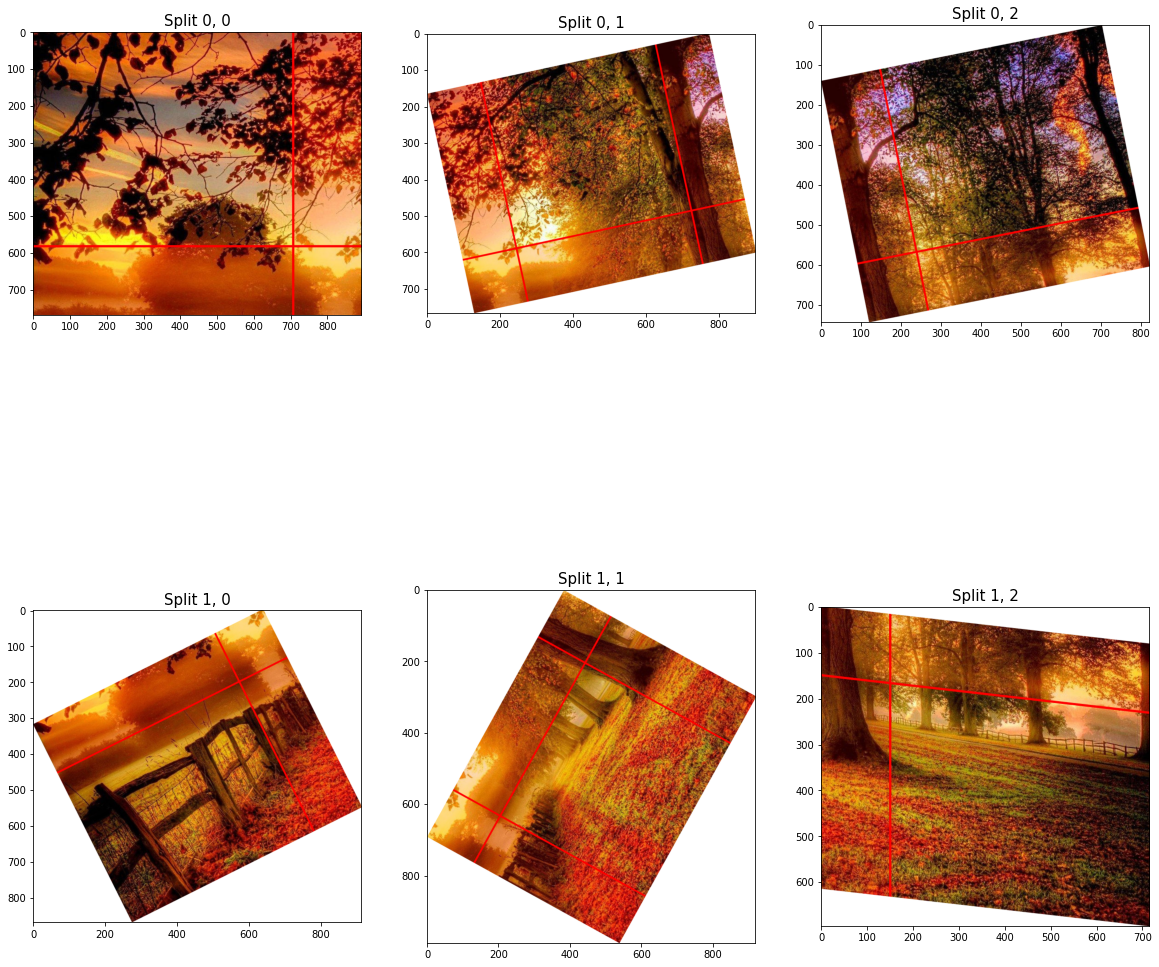

In [9]:
from utils import scale, rotation, shear
rand_transform = [scale, rotation, shear]

splits.restore()
for i in range(r_split):
    for j in range(c_split):
        rand = np.random.randint(0, len(rand_transform))
        transform = rand_transform[rand]
        splits.apply(transform, i, j)

splits = copy.deepcopy(splits)
splits.show()

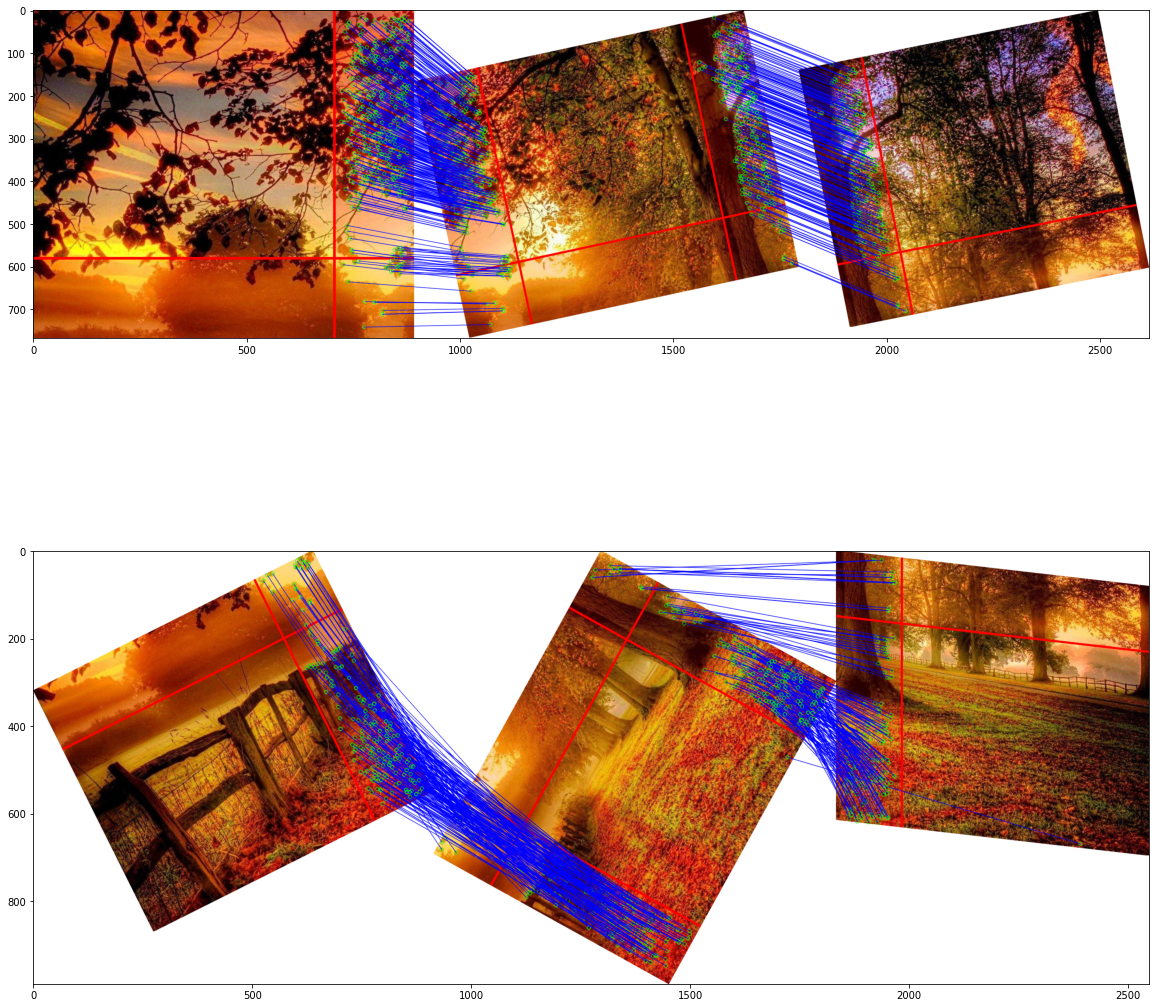

In [10]:
sift_kw = {
    "color": (255, 0, 255),
    "min_s": 3,
    "SIFT_draw": False
}

utils.view_matches(splits, axis=1, **sift_kw)

# view_matches(splits, axis=0, **sift_kw)

### Join columns

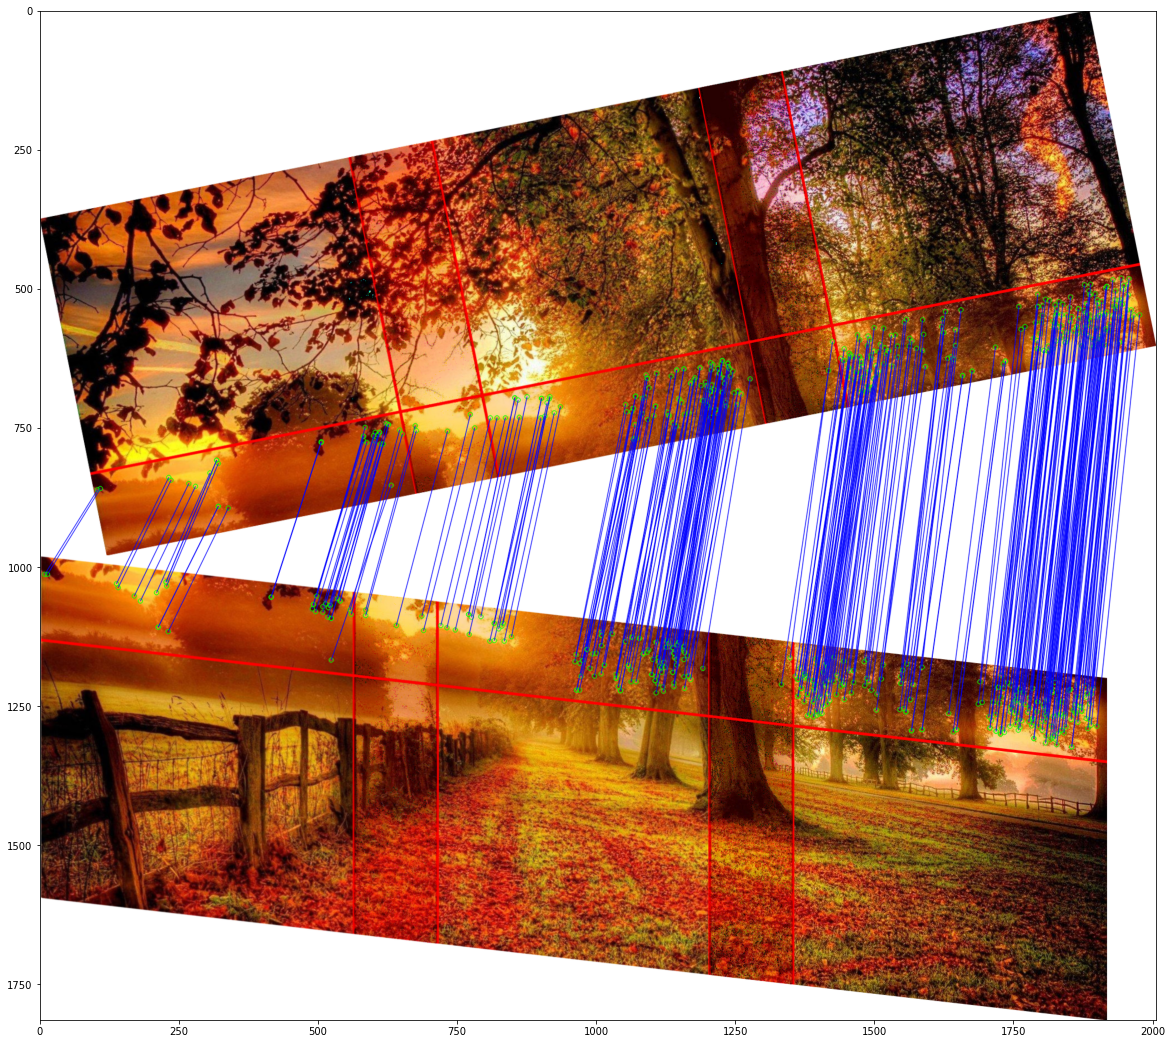

In [11]:
comp_splits = utils.join_axis(splits, axis=1, **sift_kw)
utils.view_matches(comp_splits, axis=0, **sift_kw)

# comp_splits = join_axis(splits, axis=0, **sift_kw)
# view_matches(comp_splits, axis=1, **sift_kw)

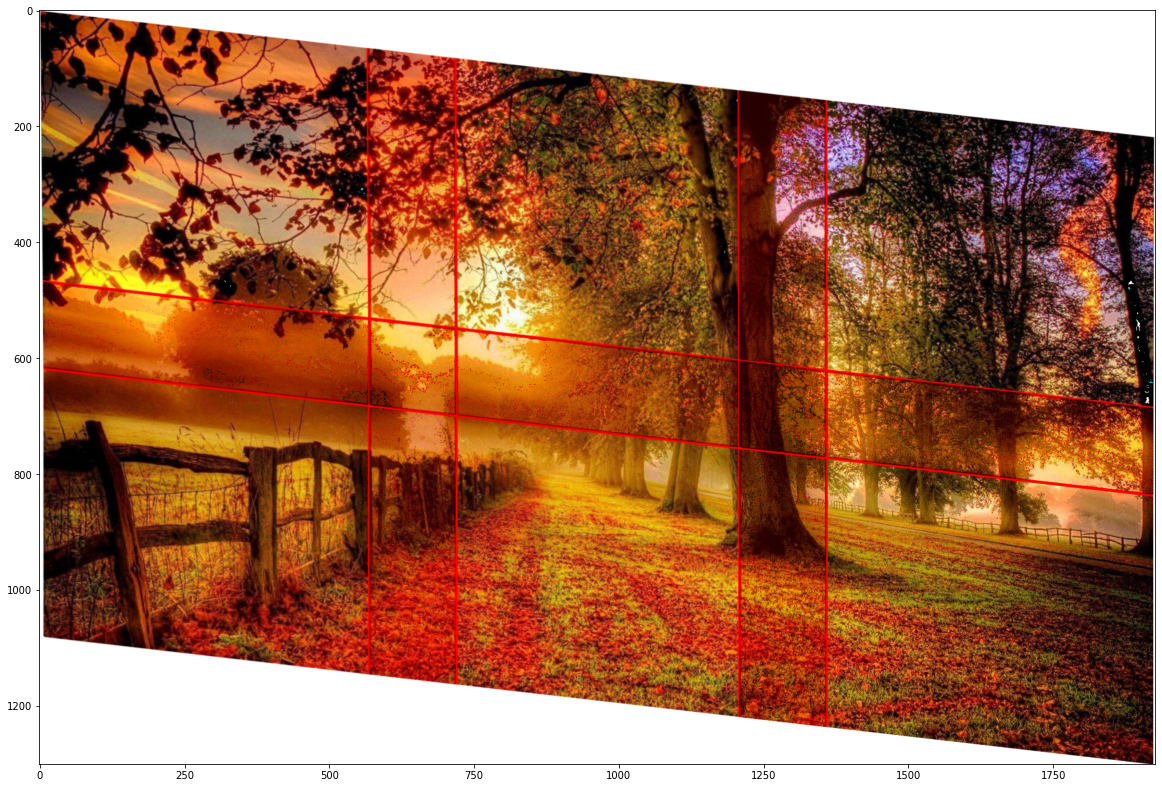

In [12]:
comp_splits = utils.join_axis(comp_splits, axis=0, **sift_kw)
comp_splits.show()